# Data Augmentation Demo

This notebook demonstrates the data augmentation pipeline used in our paper "Unified 3D MRI Representations via Sequence-Invariant Contrastive Learning". The pipeline includes:

1. **Standard Augmentations**: Geometric transformations (rotations, flips) and intensity variations
2. **Sequence Simulation**: Generating different MRI contrasts using Bloch equation simulations
3. **Paired Augmentations**: Creating multiple views of the same anatomy with different sequences

## ⚠️ Before Running

1. **Data Setup**: 
   - Update `preprocess_3d.py` to point to your local MRI/qMRI data paths
   - Ensure your data is in NIfTI format with proper orientation

2. **Dependencies**:
   ```bash
   pip install monai nibabel matplotlib cornucopia
   pip install git+https://github.com/balbasty/nitorch
   ```

3. **Hardware**:
   - Requires ~8GB RAM for 3D volume processing
   - GPU recommended but not required for visualization

## Sample Data

If you don't have access to MRI data, you can use the sample data from the hMRI toolbox: [DOWNLOAD LINK](https://github.com/hMRI-group/hMRI-toolbox-demodata)

In [1]:
import matplotlib.pyplot as plt
from preprocess_3d import get_bloch_loader, get_mprage_loader

`torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
`torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
`torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
`torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
`torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
`torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
`torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
`torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
`torch.cuda.am

In [2]:
def show_3d_slices(img, title=""):
    """Show orthogonal slices through 3D volume"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Middle slices
    slices = [img.shape[0]//2, img.shape[1]//2, img.shape[2]//2]
    
    axes[0].imshow(img[slices[0]], cmap='gray')
    axes[0].set_title("Axial")
    
    axes[1].imshow(img[:, slices[1]], cmap='gray')
    axes[1].set_title("Coronal")
    
    axes[2].imshow(img[:, :, slices[2]], cmap='gray')
    axes[2].set_title("Sagittal")
    
    fig.suptitle(title)
    plt.show()

### Baseline MPRAGE

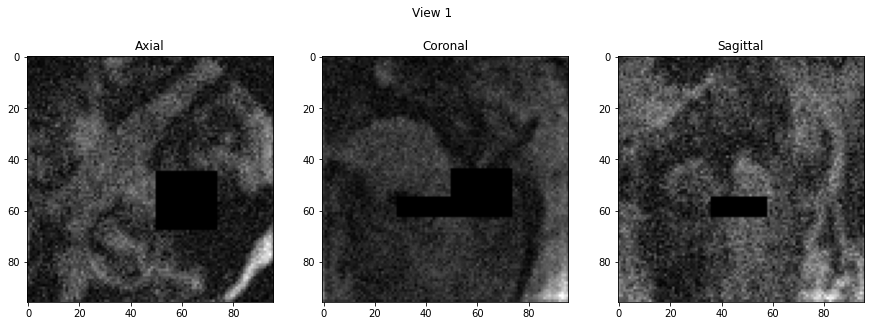

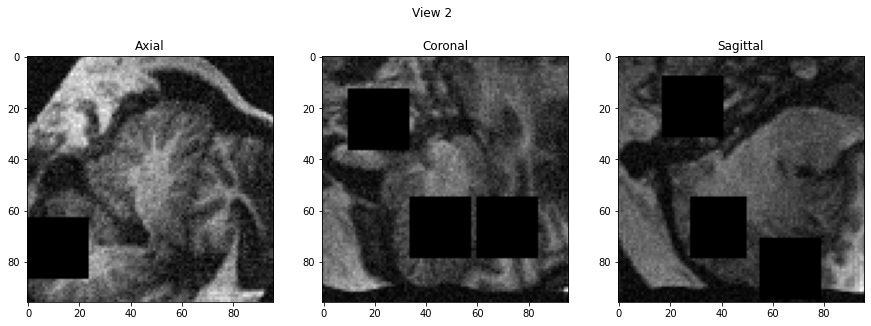

In [4]:
train_loader, _ = get_mprage_loader(
    batch_size=1,
    device="cpu",
    lowres=False,
)
sample = next(iter(train_loader))
show_3d_slices(sample["image1"][0,0].numpy(), "View 1")
show_3d_slices(sample["image2"][0,0].numpy(), "View 2")

### qMRI with single sequence (**SeqAug**)

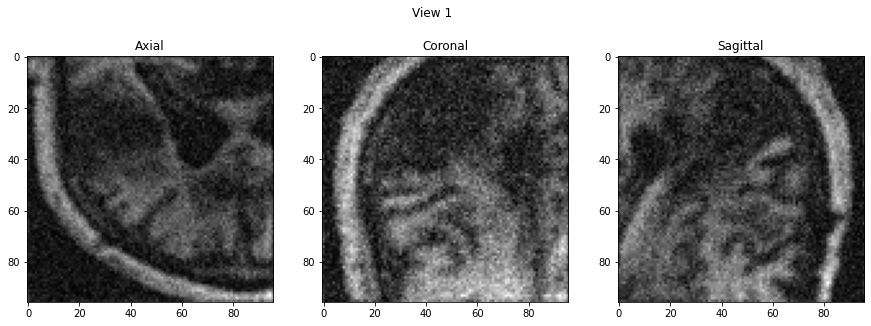

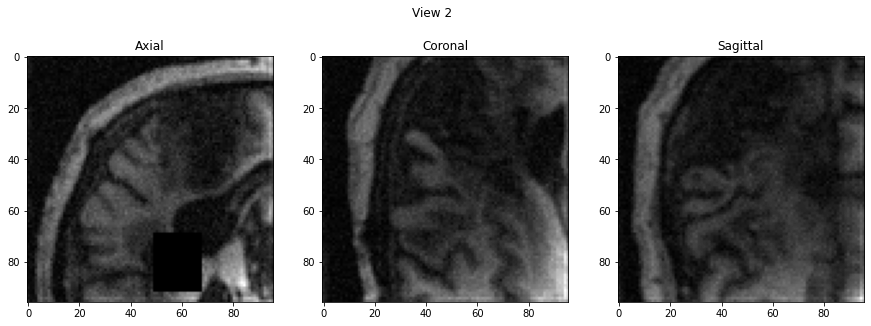

In [7]:
train_loader, _ = get_bloch_loader(
    batch_size=1,
    device="cpu",
    lowres=False,
    same_contrast=True
)
sample = next(iter(train_loader))
show_3d_slices(sample["image1"][0,0].numpy(), "View 1")
show_3d_slices(sample["image2"][0,0].numpy(), "View 2")

### qMRI with different sequences (**SeqInv**)

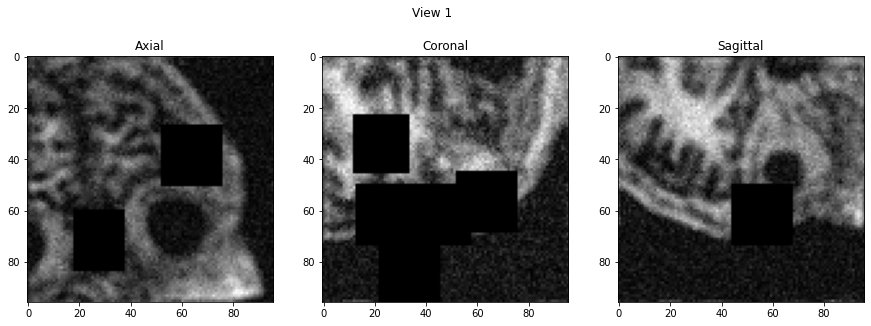

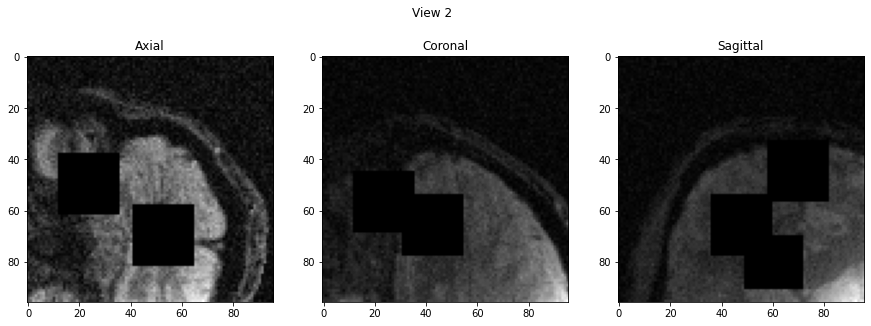

In [10]:
train_loader, _ = get_bloch_loader(
    batch_size=1,
    device="cpu",
    lowres=False,
    same_contrast=False
)
sample = next(iter(train_loader))
show_3d_slices(sample["image1"][0,0].numpy(), "View 1")
show_3d_slices(sample["image2"][0,0].numpy(), "View 2")